In [321]:
import os
import glob
import numpy as np
import pandas as pd

In [322]:
import datetime

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [324]:
# Set directory where files are located.
directory = '/Users/milko/Local/Data/Disease/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports'
directory

'/Users/milko/Local/Data/Disease/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports'

In [325]:
# Remember to close the path with a slash!
if directory[-1] != '/':
    directory += '/'
directory

'/Users/milko/Local/Data/Disease/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'

In [326]:
# Get the list of existing columns.

columns_all = set()
for file in glob.glob(directory + "*.csv"):
    for column in pd.read_csv(file, nrows=1):
        columns_all.add(column)

# Add date column.
columns_all.add('Date')

columns_all

{'Active',
 'Admin2',
 'Combined_Key',
 'Confirmed',
 'Country/Region',
 'Country_Region',
 'Date',
 'Deaths',
 'FIPS',
 'Last Update',
 'Last_Update',
 'Lat',
 'Latitude',
 'Long_',
 'Longitude',
 'Province/State',
 'Province_State',
 'Recovered'}

In [327]:
# Set the column mappings.
columns_map = {
    'Country/Region': 'Country',
    'Province/State': 'Province',
    'Country_Region': 'Country',
    'Province_State': 'Province',
    'Lat': 'Latitude',
    'Long_': 'Longitude'
}

In [328]:
# Load all data.
df = pd.DataFrame()
for file in glob.glob(directory + "*.csv"):
    
    # Extract date.
    month, day, year = os.path.basename(file)[:10].split('-')
    date = datetime.date(int(year), int(month), int(day))
    
    # Load report.
    report = pd.read_csv(file)
    
    # Normalise columns.
    for key, value in columns_map.items():
        report.rename(columns={ key: value }, inplace=True)
    
    # Add date.
    report['Date'] = date
    
    # Set computed active cases
    report['Current'] = report['Confirmed'] - (report['Recovered'] + report['Deaths'])
    
    # Append to data frame.
    df = df.append(report, sort=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65455 entries, 0 to 254
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Province      58893 non-null  object 
 1   Country       65455 non-null  object 
 2   Last Update   7617 non-null   object 
 3   Confirmed     65436 non-null  float64
 4   Deaths        65014 non-null  float64
 5   Recovered     65067 non-null  float64
 6   Date          65455 non-null  object 
 7   Current       64991 non-null  float64
 8   FIPS          52491 non-null  float64
 9   Admin2        52898 non-null  object 
 10  Last_Update   57838 non-null  object 
 11  Latitude      62171 non-null  float64
 12  Longitude     62171 non-null  float64
 13  Active        57838 non-null  float64
 14  Combined_Key  57838 non-null  object 
dtypes: float64(8), object(7)
memory usage: 8.0+ MB


In [329]:
# Drop unnecessary columns.
df = df.drop(
    columns=[
        'Province', 'Last Update', 'FIPS', 'Admin2', 'Last_Update',
        'Latitude', 'Longitude', 'Combined_Key'
    ]
)
df.head()

,Country,Confirmed,Deaths,Recovered,Date,Current,Active
0,Mainland China,65187.0,2615.0,20969.0,2020-02-26,41603.0,NaN
1,Mainland China,1347.0,7.0,851.0,2020-02-26,489.0,NaN
2,Mainland China,1271.0,19.0,1033.0,2020-02-26,219.0,NaN
3,South Korea,1261.0,12.0,22.0,2020-02-26,1227.0,NaN
4,Mainland China,1205.0,1.0,867.0,2020-02-26,337.0,NaN


In [330]:
# Normalise null data.
df.fillna(value=0, inplace=True)
df.head()

,Country,Confirmed,Deaths,Recovered,Date,Current,Active
0,Mainland China,65187.0,2615.0,20969.0,2020-02-26,41603.0,0.0
1,Mainland China,1347.0,7.0,851.0,2020-02-26,489.0,0.0
2,Mainland China,1271.0,19.0,1033.0,2020-02-26,219.0,0.0
3,South Korea,1261.0,12.0,22.0,2020-02-26,1227.0,0.0
4,Mainland China,1205.0,1.0,867.0,2020-02-26,337.0,0.0


In [331]:
# Check country names.
np.sort(df['Country'].unique())

array([' Azerbaijan', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Esw

In [ ]:
# Fix duplicate country names.
df['Country'].replace('Bahamas, The', 'Bahamas', inplace=True)
df['Country'].replace('Gambia, The', 'Gambia', inplace=True)
df['Country'].replace('Iran (Islamic Republic of)', 'Iran', inplace=True)
df['Country'].replace('Republic of Moldova', 'Moldova', inplace=True)
df['Country'].replace('Congo (Brazzaville)', 'Republic of the Congo', inplace=True)
df['Country'].replace('Congo (Kinshasa)', 'Congo', inplace=True)
df['Country'].replace('Russia', 'Russian Federation', inplace=True)
df['Country'].replace('UK', 'United Kingdom', inplace=True)
df['Country'].replace('US', 'United States', inplace=True)
df['Country'].replace('Mainland China', 'China', inplace=True)

In [332]:
# Group by country and date
df = df.groupby(['Country', 'Date']).sum()
df.head()

Confirmed  Deaths  Recovered  Current  Active
Country     Date                                                     
 Azerbaijan 2020-02-28        1.0     0.0        0.0      1.0     0.0
Afghanistan 2020-02-24        1.0     0.0        0.0      1.0     0.0
            2020-02-25        1.0     0.0        0.0      1.0     0.0
            2020-02-26        1.0     0.0        0.0      1.0     0.0
            2020-02-27        1.0     0.0        0.0      1.0     0.0

In [333]:
df.sort_values(['Country', 'Date'], ascending=True, inplace=True)
df.head()

Confirmed  Deaths  Recovered  Current  Active
Country     Date                                                     
 Azerbaijan 2020-02-28        1.0     0.0        0.0      1.0     0.0
Afghanistan 2020-02-24        1.0     0.0        0.0      1.0     0.0
            2020-02-25        1.0     0.0        0.0      1.0     0.0
            2020-02-26        1.0     0.0        0.0      1.0     0.0
            2020-02-27        1.0     0.0        0.0      1.0     0.0

In [334]:
# Save base data frame.
base = df.copy()

In [335]:
# Add daily increment values.
df = df.join(
    base.groupby(level=0).diff().rename(columns={
        'Confirmed': 'NewConf',
        'Deaths': 'NewDeat',
        'Recovered': 'NewReco',
        'Active': 'NewAct',
        'Current': 'NewCur'
    }).fillna(0),
    how='left'
)

In [337]:
# Add daily increment percentages.
df = df.join(
    base.groupby(level=0).pct_change().rename(columns={
        'Confirmed': 'PctConf',
        'Deaths': 'PctDeat',
        'Recovered': 'PctReco',
        'Active': 'PctAct',
        'Current': 'PctCur'
    }).fillna(0),
    how='left'
)

In [387]:
country = 'Mainland China'
df.loc[country].sort_index(axis=0, ascending=True, inplace=True)
dataset = df.loc[country].reset_index()
dataset['Days'] = (dataset['Date'] - dataset['Date'].min()) / np.timedelta64(1,'D')
dataset.head()

,Date,Confirmed,Deaths,Recovered,Current,Active,NewConf,NewDeat,NewReco,NewCur,NewAct,PctConf,PctDeat,PctReco,PctCur,PctAct,Days
0,2020-01-22,547.0,17.0,28.0,399.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,2020-01-23,639.0,18.0,30.0,399.0,0.0,92.0,1.0,2.0,0.0,0.0,0.168190,0.058824,0.071429,0.000000,0.0,1.0
2,2020-01-24,916.0,26.0,36.0,494.0,0.0,277.0,8.0,6.0,95.0,0.0,0.433490,0.444444,0.200000,0.238095,0.0,2.0
3,2020-01-25,1399.0,42.0,39.0,689.0,0.0,483.0,16.0,3.0,195.0,0.0,0.527293,0.615385,0.083333,0.394737,0.0,3.0
4,2020-01-26,2062.0,56.0,49.0,1002.0,0.0,663.0,14.0,10.0,313.0,0.0,0.473910,0.333333,0.256410,0.454282,0.0,4.0


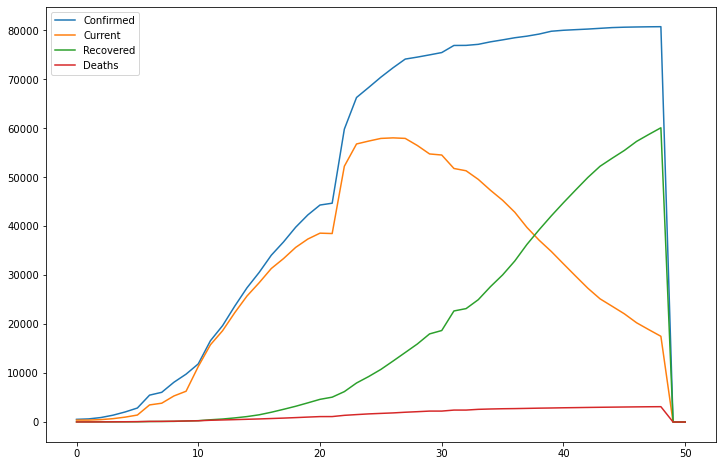

In [388]:
dataset[['Confirmed', 'Current', 'Recovered', 'Deaths']]\
    .plot(figsize=(12, 8))

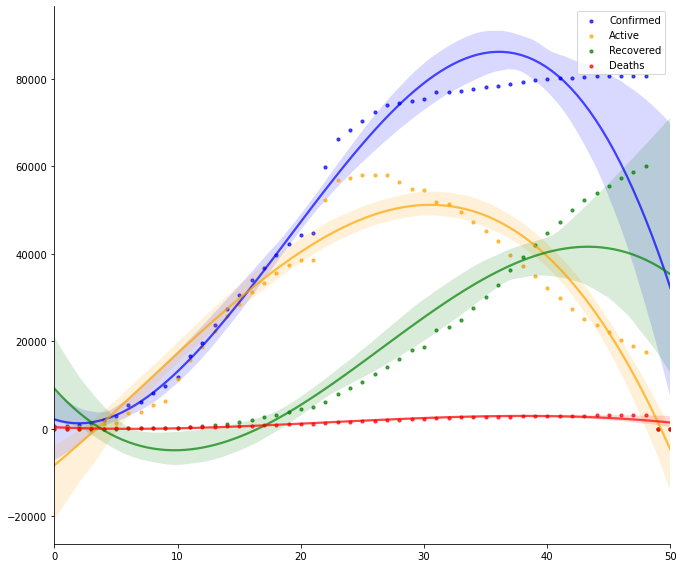

In [389]:
facets = {
    'confirmed': {
        'column': 'Confirmed',
        'color': 'blue',
        'label': "Confirmed"
    },
    'current': {
        'column': 'Current',
        'color': 'orange',
        'label': "Active"
    },
    'recovered': {
        'column': 'Recovered',
        'color': 'green',
        'label': "Recovered"
    },
    'dead': {
        'column': 'Deaths',
        'color': 'red',
        'label': "Deaths"
    }
}

alpha = 0.7
order = 3
dots = 10

g = sns.FacetGrid(data=dataset, height=8, aspect=1.2)
for key in facets.keys():
    g.map(
        sns.regplot,
        data=dataset, x='Days', y=facets[key]['column'],
        order=order,
        scatter_kws=dict(alpha=alpha, s=dots, color=facets[key]['color']),
        line_kws=dict(alpha=alpha, color=facets[key]['color']),
        label=facets[key]['label']
    )
plt.legend()

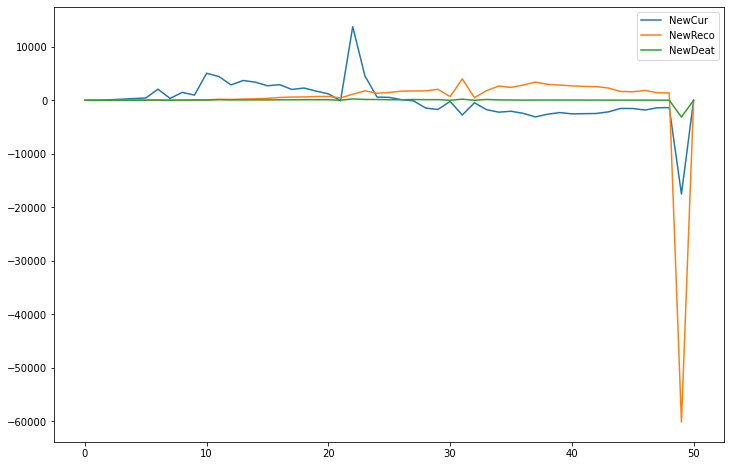

In [390]:
dataset[['NewCur', 'NewReco', 'NewDeat']]\
    .plot(figsize=(12, 8))

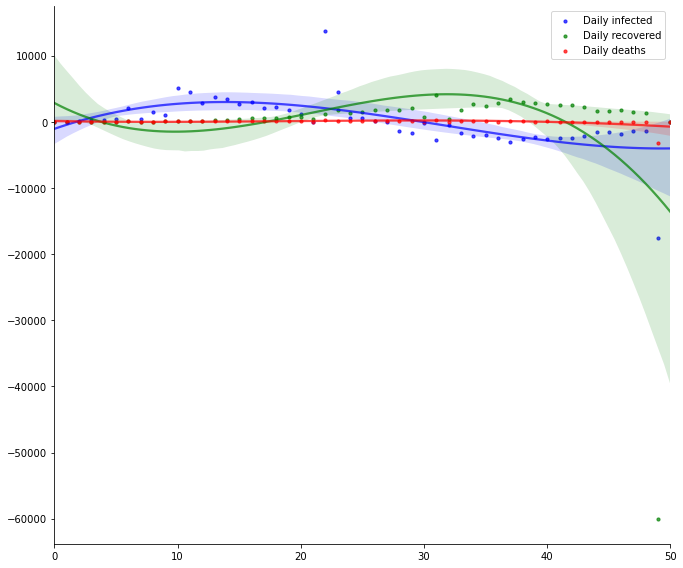

In [391]:
facets = {
    'confirmed': {
        'column': 'NewCur',
        'color': 'blue',
        'label': "Daily infected"
    },
    'recovered': {
        'column': 'NewReco',
        'color': 'green',
        'label': "Daily recovered"
    },
    'dead': {
        'column': 'NewDeat',
        'color': 'red',
        'label': "Daily deaths"
    }
}

alpha = 0.7
order = 3
dots = 10

g = sns.FacetGrid(data=dataset, height=8, aspect=1.2)
for key in facets.keys():
    g.map(
        sns.regplot,
        data=dataset, x='Days', y=facets[key]['column'],
        order=order,
        scatter_kws=dict(alpha=alpha, s=dots, color=facets[key]['color']),
        line_kws=dict(alpha=alpha, color=facets[key]['color']),
        label=facets[key]['label']
    )
plt.legend()

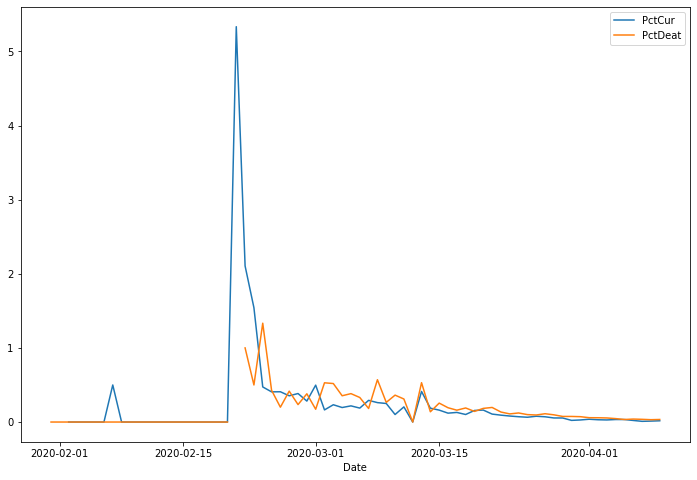

In [320]:
df.loc[country][['PctCur', 'PctDeat']].plot(figsize=(12, 8))

In [ ]:
df.to_csv('COVID-19.csv')